<a href="https://colab.research.google.com/github/saiful1604008/Thesis/blob/main/pre_trained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
data_dir = "/content/drive/MyDrive/Dataset_epiliptic_seizure/"
num_classes = 2

In [3]:
img_height,img_width=125,125
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 621 files belonging to 2 classes.
Using 559 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 621 files belonging to 2 classes.
Using 62 files for validation.


In [5]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(125,125,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [6]:
from tensorflow import keras

In [7]:
resnet_model.add(keras.layers.Flatten())
resnet_model.add(keras.layers.Dense(128,activation = 'relu'))
resnet_model.add(keras.layers.Dense(2,activation='softmax'))

In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 23,850,242
Trainable params: 262,530
Non-trainable params: 23,587,712
_________________________________________________________________


In [9]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
18/18 [==============================] - 47s 2s/step - loss: 0.1572 - accuracy: 0.9249 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 2/10
18/18 [==============================] - 31s 2s/step - loss: 0.0634 - accuracy: 0.9803 - val_loss: 0.0342 - val_accuracy: 0.9839
Epoch 3/10
18/18 [==============================] - 31s 2s/step - loss: 0.0624 - accuracy: 0.9732 - val_loss: 0.0760 - val_accuracy: 0.9516
Epoch 4/10
18/18 [==============================] - 30s 2s/step - loss: 0.0656 - accuracy: 0.9732 - val_loss: 0.0729 - val_accuracy: 0.9839
Epoch 5/10
18/18 [==============================] - 31s 2s/step - loss: 0.0585 - accuracy: 0.9767 - val_loss: 0.0588 - val_accuracy: 0.9839
Epoch 6/10
18/18 [==============================] - 31s 2s/step - loss: 0.0440 - accuracy: 0.9839 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 30s 2s/step - loss: 0.0421 - accuracy: 0.9857 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 8/10
18/18 [==

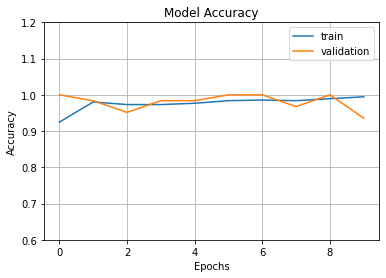

In [16]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.6,ymax=1.2)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

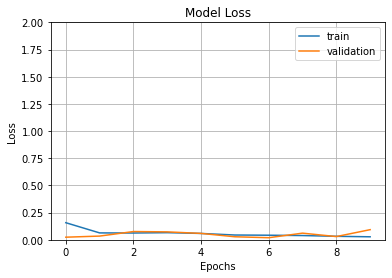

In [19]:
fig2 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0,ymax=2)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [32]:
training_accuracy_resnet      = history.history['accuracy'][-1]
training_loss_resnet          = history.history['loss'][-1]
validation_accuracy_resnet    = history.history['val_accuracy'][-1]
validation_loss_resnet        = history.history['val_loss'][-1]


print("Training Accuracy ResNet   :", training_accuracy_resnet )
print("Training Loss ResNet       :", training_loss_resnet)
print("Validation Accuracy ResNet :", validation_accuracy_resnet)
print("Validation Loss ResNet     :", validation_loss_resnet)

Training Accuracy ResNet   : 0.9946332573890686
Training Loss ResNet       : 0.027661338448524475
Validation Accuracy ResNet : 0.9354838728904724
Validation Loss ResNet     : 0.09320668876171112
